In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Load data

In [2]:
base = Path.home() / "Documents/UNT/csce6260/projects/kitti-experiments/data/2011_09_26/2011_09_26_drive_0001_sync"
img_dir = base / "image_02" / "data"
velo_dir = base / "velodyne_points" / "data"
calib_file = base / "calib_cam_to_cam.txt"

Sample Image Path: /home/tom/Documents/UNT/csce6260/projects/kitti-experiments/data/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000000.png



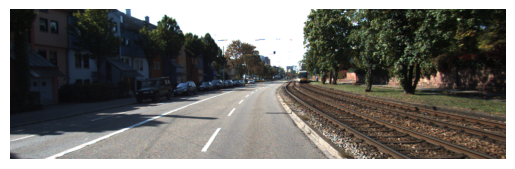

In [3]:
analysis_file_index = 0
kitti_images = sorted(img_dir.glob("*.png"))
sample_image_path = kitti_images[analysis_file_index]
print(f"Sample Image Path: {sample_image_path}\n")

sample_image = mpimg.imread(sample_image_path)

plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [4]:
bin_path = velo_dir / f"{sample_image_path.stem}.bin"
print("Sample Cloud File Path: {}\n".format(bin_path))

points = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)[:, :3]

print('--> .bin File Content\n')
print(points[:3])

Sample Cloud File Path: /home/tom/Documents/UNT/csce6260/projects/kitti-experiments/data/2011_09_26/2011_09_26_drive_0001_sync/velodyne_points/data/0000000000.bin

--> .bin File Content

[[78.372  8.078  2.873]
 [77.816  9.63   2.861]
 [71.744 10.138  2.659]]


In [5]:
print('Min/Max values for all dimensions')
min_x, max_x = np.min(points[:,0]), np.max(points[:,0])
min_y, max_y = np.min(points[:,1]), np.max(points[:,1])
min_z, max_z = np.min(points[:,2]), np.max(points[:,2])
print(f"X: ({min_x:.2f}, {max_x:.2f})")
print(f"Y: ({min_y:.2f}, {max_y:.2f})")
print(f"Z: ({min_z:.2f}, {max_z:.2f})")

Min/Max values for all dimensions
X: (-78.52, 78.67)
Y: (-34.78, 73.11)
Z: (-4.97, 2.87)


## Voxel downsampling

In [ ]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
print("Original:", np.asarray(pcd.points).shape)
pcd = pcd.voxel_down_sample(voxel_size=0.2)
print("Downsampled:", np.asarray(pcd.points).shape)
o3d.visualization.draw_geometries([pcd], width=1600, height=900)

## RANSAC Segmentation

In [ ]:
plane_model, inliers = pcd_down.segment_plane(distance_threshold=0.3, ransac_n=3, num_iterations=150)
inlier_cloud = pcd_down.select_by_index(inliers)
inlier_cloud.paint_uniform_color([0, 1, 1])
outlier_cloud = pcd_down.select_by_index(inliers, invert=True)
outlier_cloud.paint_uniform_color([1, 0, 0])
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud], width=1600, height=900)